##### Importing Liberaries

In [52]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset and Data Information


In [53]:
#Loading dataset
df=pd.read_csv('Advertising.txt')

#Let's check how the data is distributed
df.head()



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [54]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [55]:
# no. of rows and coloumns
df.shape# no. of rows and coloumns


(200, 5)

In [56]:
df=df.drop(columns ="Unnamed: 0",axis=1)
#titanic_data= titanic_data.drop(columns ='Cabin',axis=1)

In [57]:
df


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [58]:
# check for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [59]:
# check the stats
df.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visulisation of Data

<AxesSubplot:xlabel='sales', ylabel='Density'>

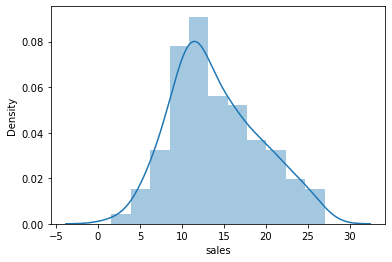

In [60]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

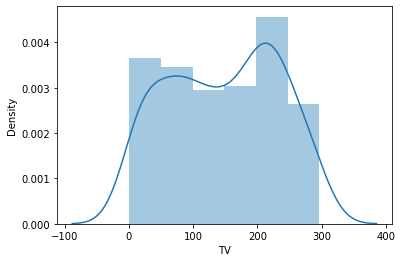

In [61]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

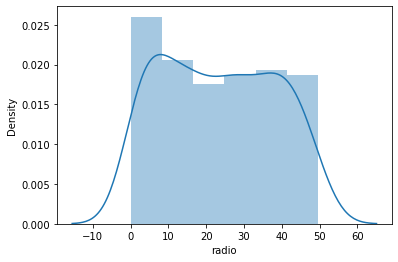

In [62]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

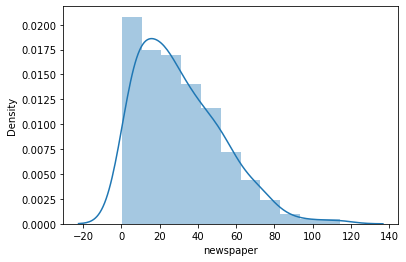

In [63]:
sns.distplot(df['newspaper'])

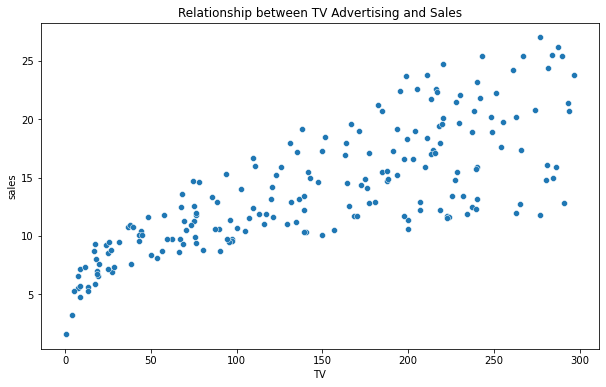

In [64]:
plt.figure(figsize=[10,6])
plt.title('Relationship between TV Advertising and Sales')
sns.scatterplot(df['TV'], df['sales']);

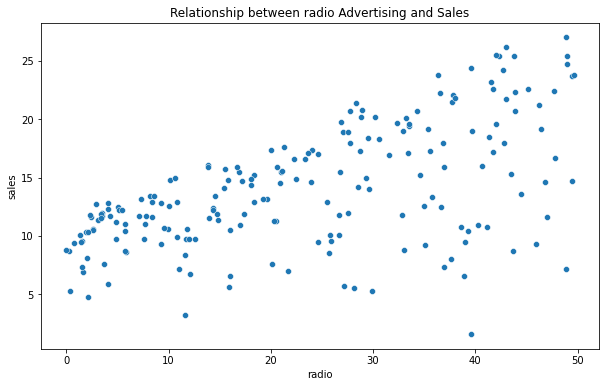

In [65]:
plt.figure(figsize=[10,6])
plt.title('Relationship between radio Advertising and Sales')
sns.scatterplot(df['radio'], df['sales']);

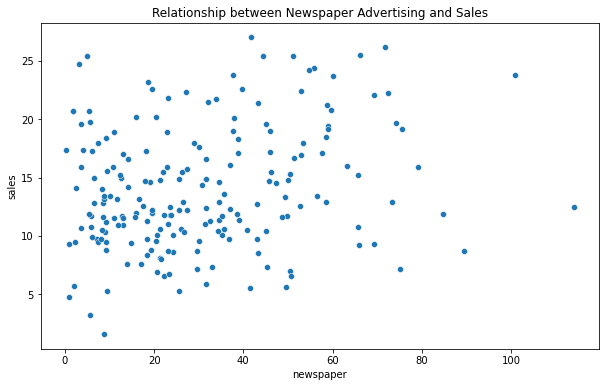

In [66]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Newspaper Advertising and Sales')
sns.scatterplot(df['newspaper'], df['sales']);

In [67]:
# corelation
corr_mat=df.corr()
corr_mat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


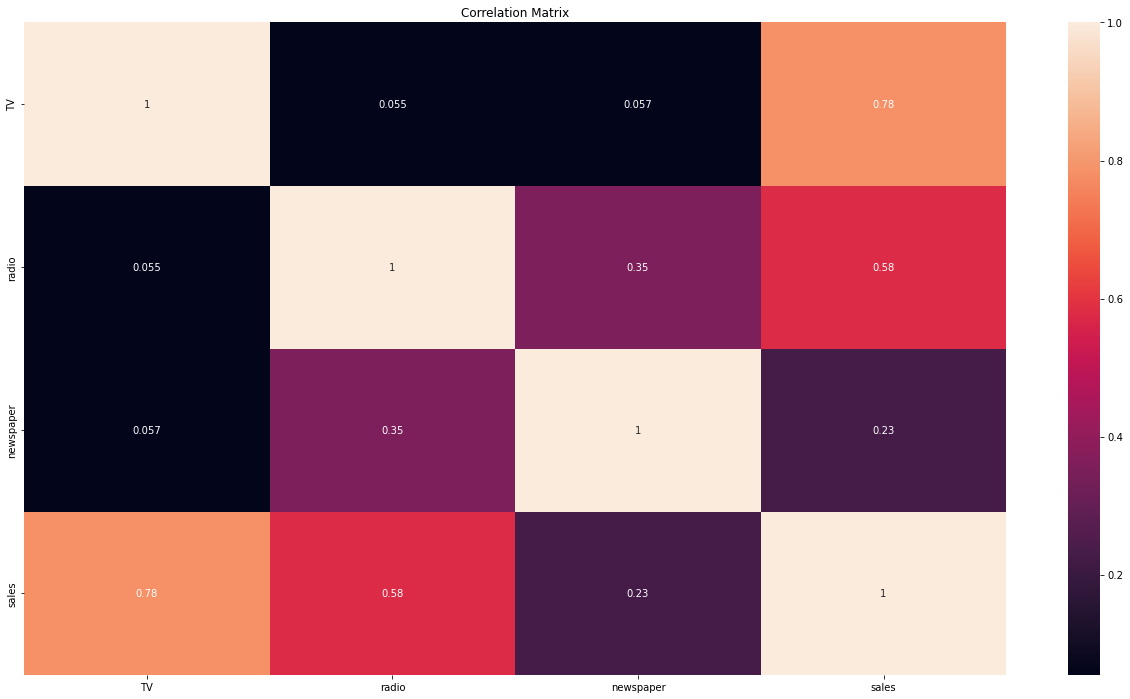

In [68]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

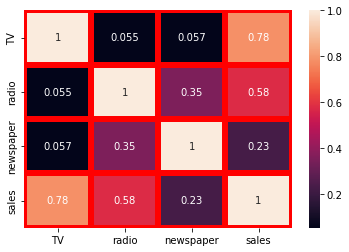

In [69]:
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='r')

In [70]:
corr_mat["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

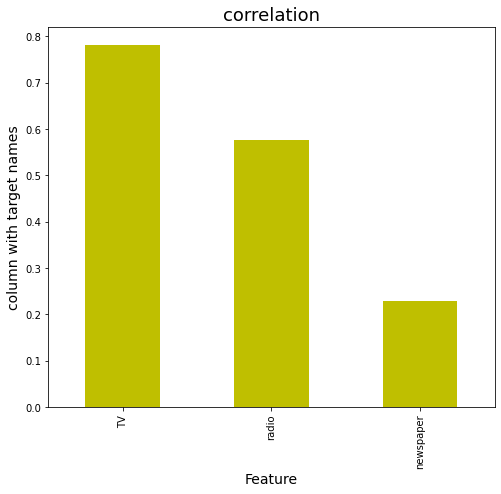

In [71]:
plt.figure(figsize=(8,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### splitting Features and Target 

In [72]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [73]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

Checking for the Skewness and found newspaper has more skewness as predicted by distplot analysis

In [74]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [75]:
# Removing Skewness through Power Transforms
df_skew.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

In [76]:
df=df_skew
x=df_skew

### Outlier Detection


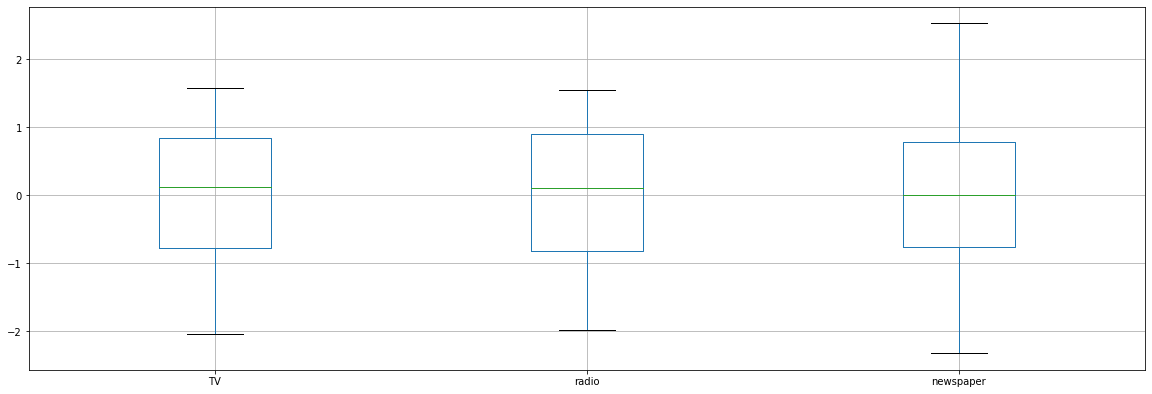

In [77]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Data Standardization

In [78]:
# Scaling the Feature data

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

### Splitting Data into Train Data and Test Data

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

### Model Building

In [80]:
#Linear Regression Model
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.9260548354681654
1.5714045320505132
1.2535567526245126


In [81]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.8978060430607071


Linear Regression Model Difference is 92.57 - 89.53 = 3.04

In [82]:
#Ridge Regression Model Build:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.9250765689591487
1.5921936186061345
1.2618215478450725


In [83]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.8978620959324853


Ridge Regression Model Difference is 92.48 - 89.53 = 2.95¶

In [84]:
#Lasso Regression Model Build:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.82858513530148
3.6427276476221087
1.9085931068779718


In [85]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.8270960357806553


Lasso Regression Model Difference is 82.85 - 82.70 = 0.15¶

In [86]:
#andom Forest Regressor Model Build:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.9862843926637375
0.29146960000000266
0.5398792457577922


In [87]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.9755244142919473


Random Forest Regressor Model Difference is 98.53 - 97.33 = 1.20.    
Lasso Regression Model has the least difference in r2_score so it is the best model


### Hyper Parameter Tuning

In [88]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Lasso(),parameters1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
                         'max_iter': [200, 900],
                         'random_state': [200, 700, 900],
                         'selection': ['cyclic', 'random']})

In [89]:
GCV.best_params_

{'alpha': 4.0, 'max_iter': 200, 'random_state': 200, 'selection': 'cyclic'}

Obtaining the Best Parameters for Hyper parameters tuning

In [90]:
mod1=Lasso(alpha=4.0,random_state=200,selection='cyclic',max_iter=200)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

98.62843926637375
0.29146960000000266
0.5398792457577922


Lasso Model r2_score after Hyper parameter Tuning is 98.53%

### Save the model

In [91]:
import joblib
joblib.dump(mod1,"Advertising_Sales_Lasso.pkl")

['Advertising_Sales_Lasso.pkl']